In [42]:
!pip install -q catboost

In [43]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# Data Load & Check

In [44]:
import pandas as pd

In [45]:
# 방문 정보
df_place = pd.read_csv('/content/tn_visit_area_info_방문지정보_A.csv')
df_place.head(5)

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
0,2210300006,a_a015688,5,프로방스마을,2022-10-30,2022-10-30,경기 파주시 탄현면 새오리로 77,경기 파주시 탄현면 성동리 82-1,126.685239,37.790405,...,NaN,60.0,7,Y,9.0,NaN,4.0,4.0,4.0,NaN
1,2208050001,a_a000164,1,친구/친지집,2022-08-05,2022-08-05,NaN,경기도 안산시 단원구 와동,NaN,NaN,...,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,41273.0
2,2210030002,a_a004293,2,병점역 1호선,2022-10-03,2022-10-03,경기 화성시 떡전골로 97,경기 화성시 진안동 824-1,127.033200,37.206753,...,병점역,30.0,9,Y,6.0,NaN,4.0,5.0,5.0,NaN
3,2208200003,a_a000491,12,더현대서울,2022-08-20,2022-08-20,서울 영등포구 여의대로 108,서울 영등포구 여의도동 22,126.928446,37.525872,...,NaN,180.0,4,N,2.0,NaN,5.0,5.0,5.0,NaN
4,2208110007,a_a000172,13,강릉중앙시장,2022-08-11,2022-08-11,강원 강릉시 금성로 21,강원 강릉시 성남동 50,128.898624,37.754025,...,신흥수산,30.0,4,N,1.0,NaN,4.0,4.0,4.0,NaN


In [46]:
df_place.columns

Index(['VISIT_AREA_ID', 'TRAVEL_ID', 'VISIT_ORDER', 'VISIT_AREA_NM',
       'VISIT_START_YMD', 'VISIT_END_YMD', 'ROAD_NM_ADDR', 'LOTNO_ADDR',
       'X_COORD', 'Y_COORD', 'ROAD_NM_CD', 'LOTNO_CD', 'POI_ID', 'POI_NM',
       'RESIDENCE_TIME_MIN', 'VISIT_AREA_TYPE_CD', 'REVISIT_YN',
       'VISIT_CHC_REASON_CD', 'LODGING_TYPE_CD', 'DGSTFN', 'REVISIT_INTENTION',
       'RCMDTN_INTENTION', 'SGG_CD'],
      dtype='object')

In [47]:
# 여행 정보
df_travel = pd.read_csv('/content/tn_travel_여행_A.csv')
df_travel.head(5)

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,a_a014262,A03,a014262,1;11;2;22;,2022-10-29,2022-10-30,자가용,NaN,1;11;2;22;,2;1;22
1,a_a006728,A03,a006728,21;24;5;22;26;27;,2022-10-10,2022-10-11,자가용,NaN,21;24;5;22;26;27;,6;1;22
2,a_a015745,A02,a015745,1;2;6;,2022-10-31,2022-11-03,대중교통 등,NaN,1;2;6;,13;3;28
3,a_a010544,A03,a010544,21;22;24;26;,2022-11-01,2022-11-02,자가용,NaN,21;22;24;26;,1;22;26
4,a_a012058,A03,a012058,1;4;10;12;21;22;26;,2022-11-05,2022-11-06,대중교통 등,수도권 외 거주 39세 이하 커플,1;4;10;12;21;22;26;,1;21;22


In [48]:
df_travel.columns

Index(['TRAVEL_ID', 'TRAVEL_NM', 'TRAVELER_ID', 'TRAVEL_PURPOSE',
       'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM', 'TRAVEL_PERSONA',
       'TRAVEL_MISSION', 'TRAVEL_MISSION_CHECK'],
      dtype='object')

In [49]:
# 여행객 정보
df_traveler = pd.read_csv('/content/tn_traveller_master_여행객 Master_A.csv')
df_traveler.head(5)

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b015583,41,여,20,6,1.0,1.0,5,3.0,NaN,...,1,7,경기도,충남,2인 여행(가족 외),2022-10-29~2022-10-30,1,NaN,NaN,1
1,a001105,30,남,30,6,1.0,1.0,2,3.0,NaN,...,6,5,대전광역시,경기,3인 이상 여행(가족 외),2022-09-03~2022-09-04,3,NaN,NaN,7
2,a001673,41,여,30,4,1.0,2.0,3,NaN,1.0,...,2,7,경기도,서울,자녀 동반 여행,2022-09-18~2022-09-19,10,7.0,1.0,2
3,a017690,41,여,30,6,1.0,1.0,3,3.0,NaN,...,4,5,경기도,서울,3인 이상 여행(가족 외),2022-11-12~2022-11-12,3,1.0,2.0,3
4,c006666,28,여,30,6,1.0,1.0,3,13.0,NaN,...,5,5,인천광역시,경기,나홀로 여행,2022-10-18~2022-10-18,1,7.0,2.0,0


In [50]:
df_traveler.columns

Index(['TRAVELER_ID', 'RESIDENCE_SGG_CD', 'GENDER', 'AGE_GRP', 'EDU_NM',
       'EDU_FNSH_SE', 'MARR_STTS', 'FAMILY_MEMB', 'JOB_NM', 'JOB_ETC',
       'INCOME', 'HOUSE_INCOME', 'TRAVEL_TERM', 'TRAVEL_NUM',
       'TRAVEL_LIKE_SIDO_1', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SIDO_2',
       'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SIDO_3', 'TRAVEL_LIKE_SGG_3',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION',
       'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_STATUS_YMD', 'TRAVEL_MOTIVE_1',
       'TRAVEL_MOTIVE_2', 'TRAVEL_MOTIVE_3', 'TRAVEL_COMPANIONS_NUM'],
      dtype='object')

# 데이터 병합 (Merge)

In [51]:
df = pd.merge(df_place, df_travel, on='TRAVEL_ID', how='left') # on TRAVEL_ID 주의
df = pd.merge(df, df_traveler, on='TRAVELER_ID', how='left') # on TRAVELER_ID 주의

df

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,2210300006,a_a015688,5,프로방스마을,2022-10-30,2022-10-30,경기 파주시 탄현면 새오리로 77,경기 파주시 탄현면 성동리 82-1,126.685239,37.790405,...,6.0,6.0,경기도,경기,나홀로 여행,2022-10-30~2022-10-31,1.0,7.0,10.0,0.0
1,2208050001,a_a000164,1,친구/친지집,2022-08-05,2022-08-05,NaN,경기도 안산시 단원구 와동,NaN,NaN,...,3.0,5.0,경기도,경기,2인 여행(가족 외),2022-08-05~2022-08-06,3.0,2.0,1.0,1.0
2,2210030002,a_a004293,2,병점역 1호선,2022-10-03,2022-10-03,경기 화성시 떡전골로 97,경기 화성시 진안동 824-1,127.033200,37.206753,...,7.0,2.0,경기도,경기,나홀로 여행,2022-10-03~2022-10-03,6.0,2.0,1.0,0.0
3,2208200003,a_a000491,12,더현대서울,2022-08-20,2022-08-20,서울 영등포구 여의대로 108,서울 영등포구 여의도동 22,126.928446,37.525872,...,5.0,7.0,울산광역시,서울,2인 가족 여행,2022-08-19~2022-08-20,1.0,3.0,7.0,1.0
4,2208110007,a_a000172,13,강릉중앙시장,2022-08-11,2022-08-11,강원 강릉시 금성로 21,강원 강릉시 성남동 50,128.898624,37.754025,...,2.0,4.0,광주광역시,서울,나홀로 여행,2022-08-10~2022-08-13,1.0,7.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,2210220005,a_a008553,5,집,2022-10-22,2022-10-23,NaN,NaN,NaN,NaN,...,6.0,3.0,서울특별시,경기,나홀로 여행,2022-10-22~2022-10-22,2.0,1.0,NaN,0.0
30150,2208280003,a_a001505,6,카페아쁠뤼스,2022-08-28,2022-08-28,경기 가평군 청평면 신청평로 107,경기 가평군 청평면 대성리 3-5,127.406939,37.728238,...,5.0,4.0,서울특별시,경기,3인 이상 여행(가족 외),2022-08-27~2022-08-28,1.0,3.0,7.0,7.0
30151,2210290005,a_a013660,4,국립중앙박물관,2022-10-29,2022-10-29,서울 용산구 서빙고로 137,서울 용산구 용산동6가 168-6,126.980203,37.523847,...,5.0,6.0,경기도,서울,나홀로 여행,2022-10-29~2022-10-30,1.0,7.0,8.0,0.0
30152,2208060008,a_a000019,7,송도달빛축제공원,2022-08-06,2022-08-06,인천 연수구 센트럴로 350,인천 연수구 송도동 26-1,126.634896,37.407218,...,5.0,3.0,서울특별시,인천,3인 이상 여행(가족 외),2022-08-06~2022-08-07,7.0,5.0,1.0,6.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30154 entries, 0 to 30153
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   VISIT_AREA_ID              30154 non-null  int64  
 1   TRAVEL_ID                  30154 non-null  object 
 2   VISIT_ORDER                30154 non-null  int64  
 3   VISIT_AREA_NM              30154 non-null  object 
 4   VISIT_START_YMD            30154 non-null  object 
 5   VISIT_END_YMD              30154 non-null  object 
 6   ROAD_NM_ADDR               20381 non-null  object 
 7   LOTNO_ADDR                 21859 non-null  object 
 8   X_COORD                    22821 non-null  float64
 9   Y_COORD                    22821 non-null  float64
 10  ROAD_NM_CD                 24 non-null     float64
 11  LOTNO_CD                   2433 non-null   object 
 12  POI_ID                     13872 non-null  object 
 13  POI_NM                     13872 non-null  obj

In [53]:
null_cnt=df.isnull().sum()
null_cnt

,0
VISIT_AREA_ID,0
TRAVEL_ID,0
VISIT_ORDER,0
VISIT_AREA_NM,0
VISIT_START_YMD,0
...,...
TRAVEL_STATUS_YMD,10732
TRAVEL_MOTIVE_1,10732
TRAVEL_MOTIVE_2,11480
TRAVEL_MOTIVE_3,12171


In [54]:
null_columns = null_cnt[null_cnt == 0]

# 결과 출력
print("Null 값이 있는 컬럼과 그 개수:")
print(null_columns)

Null 값이 있는 컬럼과 그 개수:
VISIT_AREA_ID         0
TRAVEL_ID             0
VISIT_ORDER           0
VISIT_AREA_NM         0
VISIT_START_YMD       0
VISIT_END_YMD         0
VISIT_AREA_TYPE_CD    0
dtype: int64


In [55]:
# 모든 컬럼명을 리스트로 가져오기
column_list = df.columns.tolist()

# 결과 출력
print("컬럼명 리스트:")
print(column_list)
print()

for col in column_list:
  print('컬럼 명', col)
  print(df[col])
  print()

컬럼명 리스트:
['VISIT_AREA_ID', 'TRAVEL_ID', 'VISIT_ORDER', 'VISIT_AREA_NM', 'VISIT_START_YMD', 'VISIT_END_YMD', 'ROAD_NM_ADDR', 'LOTNO_ADDR', 'X_COORD', 'Y_COORD', 'ROAD_NM_CD', 'LOTNO_CD', 'POI_ID', 'POI_NM', 'RESIDENCE_TIME_MIN', 'VISIT_AREA_TYPE_CD', 'REVISIT_YN', 'VISIT_CHC_REASON_CD', 'LODGING_TYPE_CD', 'DGSTFN', 'REVISIT_INTENTION', 'RCMDTN_INTENTION', 'SGG_CD', 'TRAVEL_NM', 'TRAVELER_ID', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM', 'TRAVEL_PERSONA', 'TRAVEL_MISSION', 'TRAVEL_MISSION_CHECK', 'RESIDENCE_SGG_CD', 'GENDER', 'AGE_GRP', 'EDU_NM', 'EDU_FNSH_SE', 'MARR_STTS', 'FAMILY_MEMB', 'JOB_NM', 'JOB_ETC', 'INCOME', 'HOUSE_INCOME', 'TRAVEL_TERM', 'TRAVEL_NUM', 'TRAVEL_LIKE_SIDO_1', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SIDO_2', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SIDO_3', 'TRAVEL_LIKE_SGG_3', 'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8', 'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_D

# 목적지 도시

In [56]:
STATUS_DESTINATION = df['TRAVEL_STATUS_DESTINATION'].value_counts()

STATUS_DESTINATION

,count
TRAVEL_STATUS_DESTINATION,
경기,9351
서울,8375
인천,1398
강원,91
충남,53
부산,38
제주,28
도서 지역,23
전남,19


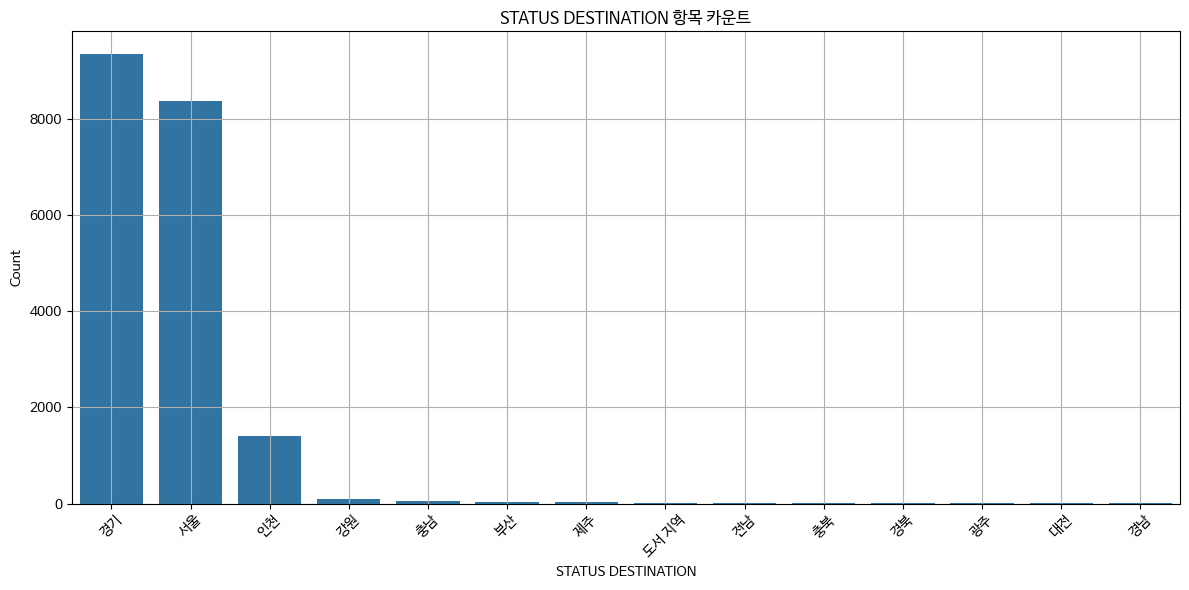

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=STATUS_DESTINATION.index, y=STATUS_DESTINATION.values)
plt.title('STATUS DESTINATION 항목 카운트')  # 그래프 제목
plt.xlabel('STATUS DESTINATION')  # x축 레이블
plt.ylabel('Count')  # y축 레이블
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.grid()
plt.show()  # 그래프 출력

# 방문지 이름

In [58]:
# VISIT_AREA_NM 컬럼의 항목들을 카운트
visit_area_counts = df['VISIT_AREA_NM'].value_counts()
visit_area_counts

,count
VISIT_AREA_NM,
집,5439
사무실,189
친구/친지집,188
서울역,169
화성행궁,115
...,...
라스블랑카스,1
NEW BLESS,1
일영모자농원캠핑장 앞 계곡,1


<ipython-input-59-a94e8a57b3a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_visit_areas.index, y=top_20_visit_areas.values, palette='viridis')


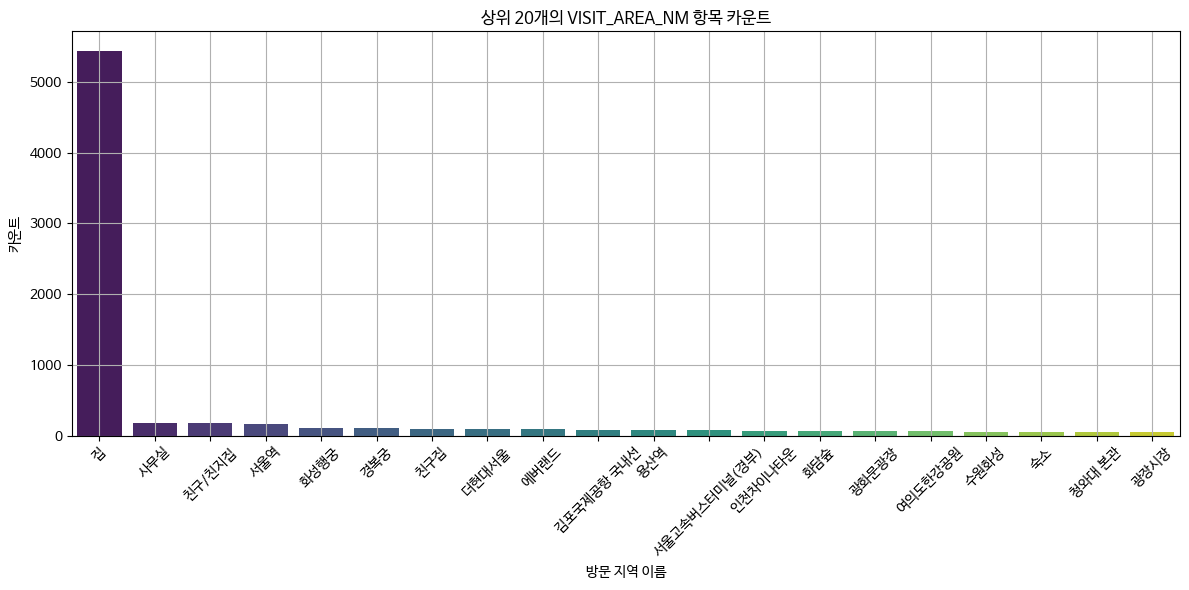

In [59]:
# 상위 20개 항목 선택
top_20_visit_areas = visit_area_counts.head(20)

# 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.barplot(x=top_20_visit_areas.index, y=top_20_visit_areas.values, palette='viridis')
plt.title('상위 20개의 VISIT_AREA_NM 항목 카운트')  # 그래프 제목
plt.xlabel('방문 지역 이름')  # x축 레이블
plt.ylabel('카운트')  # y축 레이블
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.grid()
plt.show()  # 그래프 출력

# 여행 유형 (동반자)

In [60]:
STATUS_ACCOMPANY = df['TRAVEL_STATUS_ACCOMPANY'].value_counts()

STATUS_ACCOMPANY

,count
TRAVEL_STATUS_ACCOMPANY,
나홀로 여행,7286
2인 여행(가족 외),5787
자녀 동반 여행,2146
3인 이상 여행(가족 외),2078
2인 가족 여행,1377
부모 동반 여행,396
3대 동반 여행(친척 포함),352


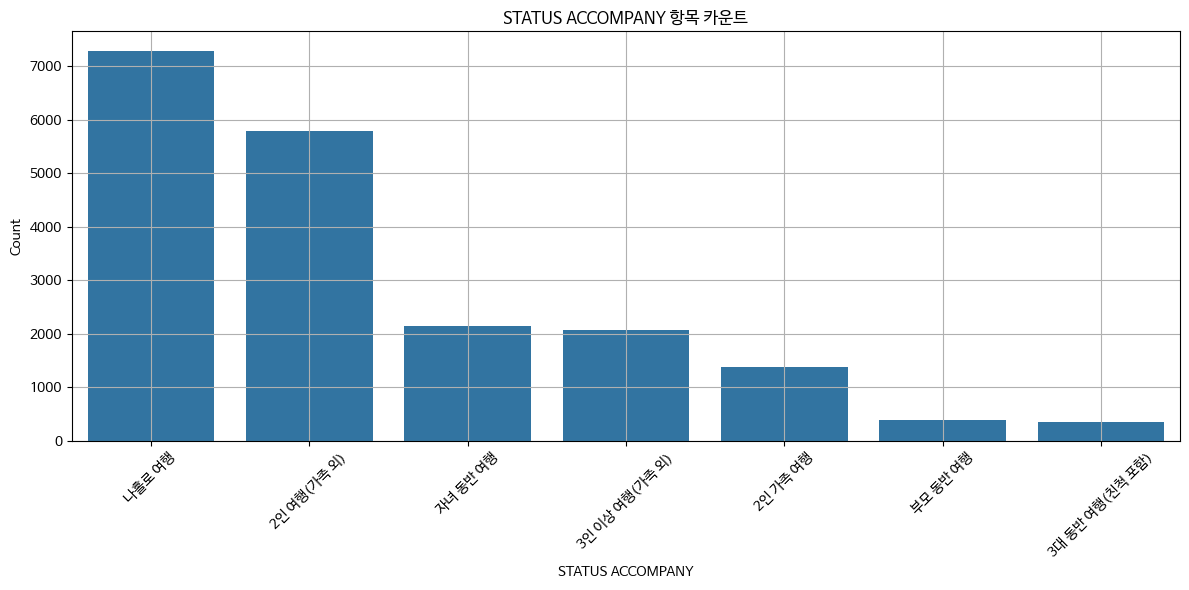

In [61]:
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=STATUS_ACCOMPANY.index, y=STATUS_ACCOMPANY.values)
plt.title('STATUS ACCOMPANY 항목 카운트')  # 그래프 제목
plt.xlabel('STATUS ACCOMPANY')  # x축 레이블
plt.ylabel('Count')  # y축 레이블
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.grid()
plt.show()  # 그래프 출력

# 성별

In [62]:
GENDER = df['GENDER'].value_counts()

GENDER

,count
GENDER,
여,11545
남,7877


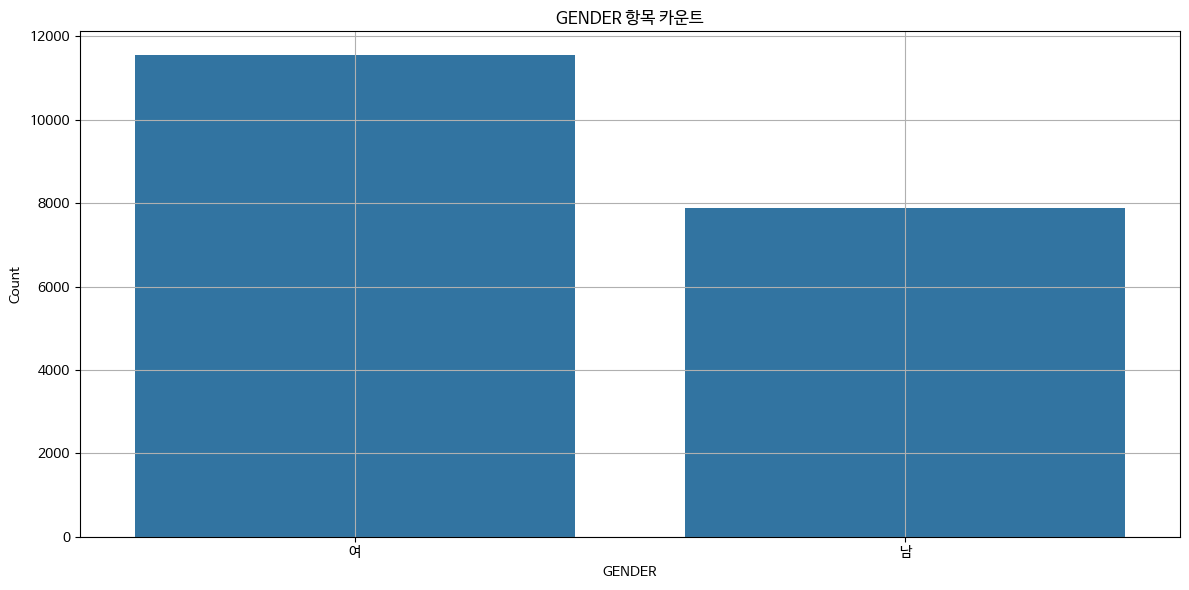

In [63]:
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=GENDER.index, y=GENDER.values)
plt.title('GENDER 항목 카운트')  # 그래프 제목
plt.xlabel('GENDER')  # x축 레이블
plt.ylabel('Count')  # y축 레이블
plt.tight_layout()  # 레이아웃 조정
plt.grid()
plt.show()  # 그래프 출력

In [64]:
df_filter = df[~df['TRAVEL_MISSION_CHECK'].isnull()].copy()

df_filter.loc[:, 'TRAVEL_MISSION_INT'] = df_filter['TRAVEL_MISSION_CHECK'].str.split(';').str[0].astype(int)

df_filter

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM,TRAVEL_MISSION_INT
0,2210300006,a_a015688,5,프로방스마을,2022-10-30,2022-10-30,경기 파주시 탄현면 새오리로 77,경기 파주시 탄현면 성동리 82-1,126.685239,37.790405,...,6.0,경기도,경기,나홀로 여행,2022-10-30~2022-10-31,1.0,7.0,10.0,0.0,5
1,2208050001,a_a000164,1,친구/친지집,2022-08-05,2022-08-05,NaN,경기도 안산시 단원구 와동,NaN,NaN,...,5.0,경기도,경기,2인 여행(가족 외),2022-08-05~2022-08-06,3.0,2.0,1.0,1.0,22
2,2210030002,a_a004293,2,병점역 1호선,2022-10-03,2022-10-03,경기 화성시 떡전골로 97,경기 화성시 진안동 824-1,127.033200,37.206753,...,2.0,경기도,경기,나홀로 여행,2022-10-03~2022-10-03,6.0,2.0,1.0,0.0,28
3,2208200003,a_a000491,12,더현대서울,2022-08-20,2022-08-20,서울 영등포구 여의대로 108,서울 영등포구 여의도동 22,126.928446,37.525872,...,7.0,울산광역시,서울,2인 가족 여행,2022-08-19~2022-08-20,1.0,3.0,7.0,1.0,6
4,2208110007,a_a000172,13,강릉중앙시장,2022-08-11,2022-08-11,강원 강릉시 금성로 21,강원 강릉시 성남동 50,128.898624,37.754025,...,4.0,광주광역시,서울,나홀로 여행,2022-08-10~2022-08-13,1.0,7.0,2.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,2210220005,a_a008553,5,집,2022-10-22,2022-10-23,NaN,NaN,NaN,NaN,...,3.0,서울특별시,경기,나홀로 여행,2022-10-22~2022-10-22,2.0,1.0,NaN,0.0,6
30150,2208280003,a_a001505,6,카페아쁠뤼스,2022-08-28,2022-08-28,경기 가평군 청평면 신청평로 107,경기 가평군 청평면 대성리 3-5,127.406939,37.728238,...,4.0,서울특별시,경기,3인 이상 여행(가족 외),2022-08-27~2022-08-28,1.0,3.0,7.0,7.0,5
30151,2210290005,a_a013660,4,국립중앙박물관,2022-10-29,2022-10-29,서울 용산구 서빙고로 137,서울 용산구 용산동6가 168-6,126.980203,37.523847,...,6.0,경기도,서울,나홀로 여행,2022-10-29~2022-10-30,1.0,7.0,8.0,0.0,3
30152,2208060008,a_a000019,7,송도달빛축제공원,2022-08-06,2022-08-06,인천 연수구 센트럴로 350,인천 연수구 송도동 26-1,126.634896,37.407218,...,3.0,서울특별시,인천,3인 이상 여행(가족 외),2022-08-06~2022-08-07,7.0,5.0,1.0,6.0,9


In [65]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23898 entries, 0 to 30153
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   VISIT_AREA_ID              23898 non-null  int64  
 1   TRAVEL_ID                  23898 non-null  object 
 2   VISIT_ORDER                23898 non-null  int64  
 3   VISIT_AREA_NM              23898 non-null  object 
 4   VISIT_START_YMD            23898 non-null  object 
 5   VISIT_END_YMD              23898 non-null  object 
 6   ROAD_NM_ADDR               16085 non-null  object 
 7   LOTNO_ADDR                 17277 non-null  object 
 8   X_COORD                    18028 non-null  float64
 9   Y_COORD                    18028 non-null  float64
 10  ROAD_NM_CD                 20 non-null     float64
 11  LOTNO_CD                   1913 non-null   object 
 12  POI_ID                     10964 non-null  object 
 13  POI_NM                     10964 non-null  object 


In [66]:
df_filter = df_filter[[
    'GENDER',
    'AGE_GRP',
    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
    'TRAVEL_MOTIVE_1',
    'TRAVEL_COMPANIONS_NUM',
    'TRAVEL_MISSION_INT',
    'VISIT_AREA_NM',
    'DGSTFN',
]]

df_filter = df_filter.dropna()

df_filter

,GENDER,AGE_GRP,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM,TRAVEL_MISSION_INT,VISIT_AREA_NM,DGSTFN
0,남,30.0,4.0,4.0,2.0,4.0,6.0,5.0,6.0,6.0,1.0,0.0,5,프로방스마을,4.0
2,여,40.0,4.0,3.0,6.0,3.0,2.0,2.0,7.0,2.0,6.0,0.0,28,병점역 1호선,4.0
3,여,30.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,7.0,1.0,1.0,6,더현대서울,5.0
4,남,30.0,7.0,1.0,1.0,1.0,7.0,7.0,2.0,4.0,1.0,0.0,2,강릉중앙시장,4.0
5,남,20.0,6.0,1.0,1.0,3.0,4.0,6.0,3.0,2.0,3.0,1.0,11,청계천,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30145,여,30.0,3.0,1.0,3.0,3.0,4.0,4.0,7.0,6.0,1.0,0.0,3,행궁동벽화마을,2.0
30150,여,30.0,1.0,3.0,1.0,3.0,4.0,4.0,5.0,4.0,1.0,7.0,5,카페아쁠뤼스,5.0
30151,남,20.0,3.0,6.0,2.0,5.0,4.0,4.0,5.0,6.0,1.0,0.0,3,국립중앙박물관,5.0
30152,남,20.0,5.0,2.0,2.0,4.0,4.0,5.0,5.0,3.0,7.0,6.0,9,송도달빛축제공원,4.0


In [67]:
categorical_features_names = [
    'GENDER',
    # 'AGE_GRP',
    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
    'TRAVEL_MOTIVE_1',
    # 'TRAVEL_COMPANIONS_NUM',
    'TRAVEL_MISSION_INT',
    'VISIT_AREA_NM',
    # 'DGSTFN',
]

df_filter[categorical_features_names[1:-1]] = df_filter[categorical_features_names[1:-1]].astype(int)

df_filter

,GENDER,AGE_GRP,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM,TRAVEL_MISSION_INT,VISIT_AREA_NM,DGSTFN
0,남,30.0,4,4,2,4,6,5,6,6,1,0.0,5,프로방스마을,4.0
2,여,40.0,4,3,6,3,2,2,7,2,6,0.0,28,병점역 1호선,4.0
3,여,30.0,4,4,4,3,4,4,5,7,1,1.0,6,더현대서울,5.0
4,남,30.0,7,1,1,1,7,7,2,4,1,0.0,2,강릉중앙시장,4.0
5,남,20.0,6,1,1,3,4,6,3,2,3,1.0,11,청계천,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30145,여,30.0,3,1,3,3,4,4,7,6,1,0.0,3,행궁동벽화마을,2.0
30150,여,30.0,1,3,1,3,4,4,5,4,1,7.0,5,카페아쁠뤼스,5.0
30151,남,20.0,3,6,2,5,4,4,5,6,1,0.0,3,국립중앙박물관,5.0
30152,남,20.0,5,2,2,4,4,5,5,3,7,6.0,9,송도달빛축제공원,4.0


In [68]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14930 entries, 0 to 30153
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 14930 non-null  object 
 1   AGE_GRP                14930 non-null  float64
 2   TRAVEL_STYL_1          14930 non-null  int64  
 3   TRAVEL_STYL_2          14930 non-null  int64  
 4   TRAVEL_STYL_3          14930 non-null  int64  
 5   TRAVEL_STYL_4          14930 non-null  int64  
 6   TRAVEL_STYL_5          14930 non-null  int64  
 7   TRAVEL_STYL_6          14930 non-null  int64  
 8   TRAVEL_STYL_7          14930 non-null  int64  
 9   TRAVEL_STYL_8          14930 non-null  int64  
 10  TRAVEL_MOTIVE_1        14930 non-null  int64  
 11  TRAVEL_COMPANIONS_NUM  14930 non-null  float64
 12  TRAVEL_MISSION_INT     14930 non-null  int64  
 13  VISIT_AREA_NM          14930 non-null  object 
 14  DGSTFN                 14930 non-null  float64
dtypes: floa

In [69]:
df_filter

,GENDER,AGE_GRP,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM,TRAVEL_MISSION_INT,VISIT_AREA_NM,DGSTFN
0,남,30.0,4,4,2,4,6,5,6,6,1,0.0,5,프로방스마을,4.0
2,여,40.0,4,3,6,3,2,2,7,2,6,0.0,28,병점역 1호선,4.0
3,여,30.0,4,4,4,3,4,4,5,7,1,1.0,6,더현대서울,5.0
4,남,30.0,7,1,1,1,7,7,2,4,1,0.0,2,강릉중앙시장,4.0
5,남,20.0,6,1,1,3,4,6,3,2,3,1.0,11,청계천,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30145,여,30.0,3,1,3,3,4,4,7,6,1,0.0,3,행궁동벽화마을,2.0
30150,여,30.0,1,3,1,3,4,4,5,4,1,7.0,5,카페아쁠뤼스,5.0
30151,남,20.0,3,6,2,5,4,4,5,6,1,0.0,3,국립중앙박물관,5.0
30152,남,20.0,5,2,2,4,4,5,5,3,7,6.0,9,송도달빛축제공원,4.0


In [70]:
DGSTFN= df_filter['DGSTFN'].value_counts()
DGSTFN

,count
DGSTFN,
5.0,6798
4.0,5648
3.0,1992
2.0,319
1.0,173


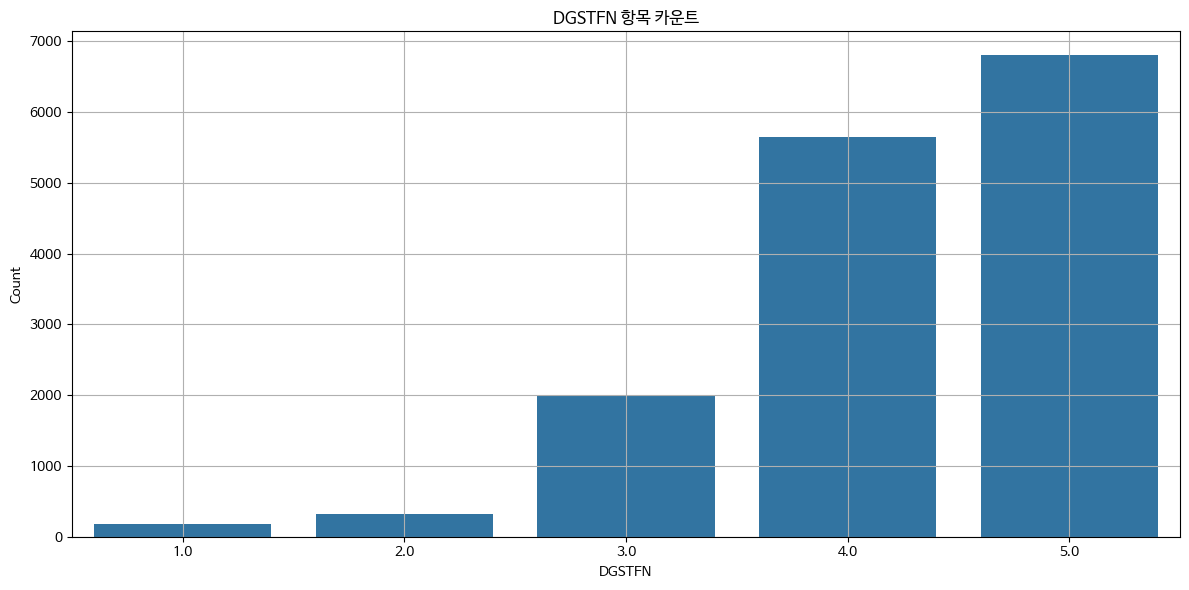

In [71]:
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=DGSTFN.index, y=DGSTFN.values)
plt.title('DGSTFN 항목 카운트')  # 그래프 제목
plt.xlabel('DGSTFN')  # x축 레이블
plt.ylabel('Count')  # y축 레이블
plt.tight_layout()  # 레이아웃 조정
plt.grid()
plt.show()  # 그래프 출력

In [72]:
from sklearn.preprocessing import LabelEncoder

# 예시 데이터프레임 생성 (실제 데이터프레임을 사용하세요)
# df = pd.read_csv('your_file.csv')

# LabelEncoder 객체 생성
label_encoders = {}

# object 타입 컬럼 찾기
object_columns = df_filter.select_dtypes(include=['object']).columns

# 각 object 컬럼을 숫자로 변환
for col in object_columns:
    le = LabelEncoder()
    df_filter[col] = le.fit_transform(df_filter[col])
    label_encoders[col] = le  # LabelEncoder 저장 (필요시 사용)

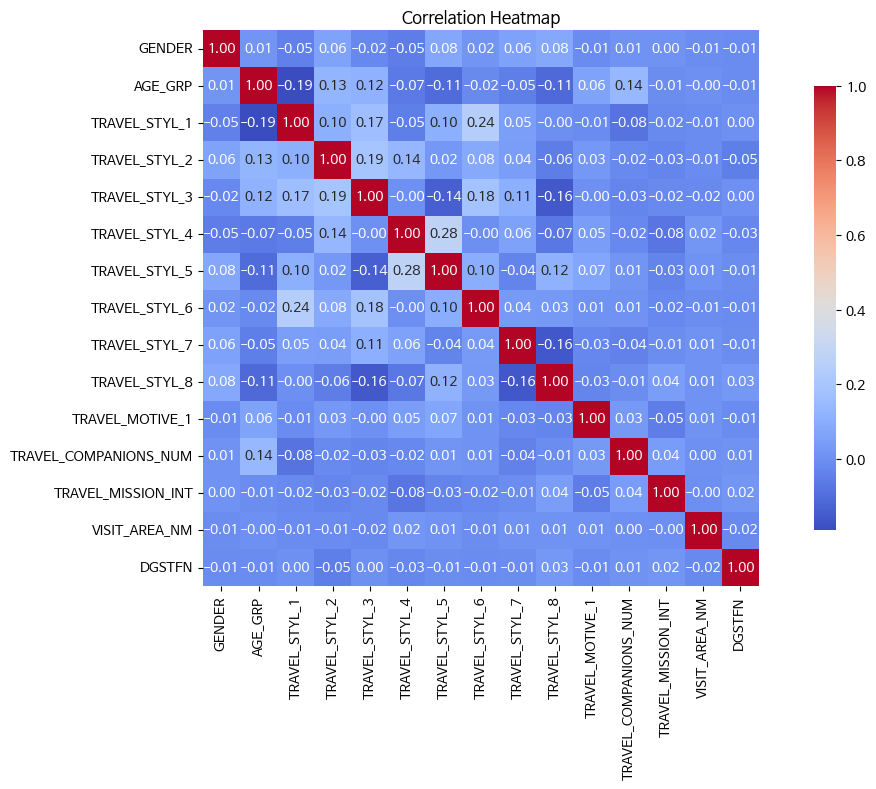

In [73]:
correlation_matrix = df_filter.corr()

# DGSTFN과의 상관 관계만 선택
dgstfn_correlation = correlation_matrix['DGSTFN']

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

# 데이터 불균형이 있는 DGSTFN 컬럼의 값 분포 확인
print("DGSTFN 값 분포:")
print(df_filter['DGSTFN'].value_counts())

print()
# train_test_split을 사용하여 데이터를 분할
train_data, test_data = train_test_split(
    df_filter,
    test_size=0.2,
    random_state=42,
    stratify=df_filter['DGSTFN']  # DGSTFN 컬럼을 기준으로 stratify
)

# 결과 확인
print("훈련 데이터 DGSTFN 값 분포:")
print(train_data['DGSTFN'].value_counts())
print("\n테스트 데이터 DGSTFN 값 분포:")
print(test_data['DGSTFN'].value_counts())

DGSTFN 값 분포:
DGSTFN
5.0    6798
4.0    5648
3.0    1992
2.0     319
1.0     173
Name: count, dtype: int64

훈련 데이터 DGSTFN 값 분포:
DGSTFN
5.0    5438
4.0    4518
3.0    1594
2.0     255
1.0     139
Name: count, dtype: int64

테스트 데이터 DGSTFN 값 분포:
DGSTFN
5.0    1360
4.0    1130
3.0     398
2.0      64
1.0      34
Name: count, dtype: int64


In [75]:
from catboost import CatBoostRegressor, Pool

train_pool = Pool(train_data.drop(['DGSTFN'], axis=1),
                  label=train_data['DGSTFN'])


test_pool = Pool(test_data.drop(['DGSTFN'], axis=1), label=test_data['DGSTFN'])

In [76]:
model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='MAE',
    task_type='GPU',
    depth=6,
    learning_rate=0.001,
    n_estimators=2000)

model.fit(
    train_pool,
    eval_set=test_pool,
    verbose=500,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.6881834	test: 0.6875217	best: 0.6875217 (0)	total: 62.6ms	remaining: 2m 5s
500:	learn: 0.6816213	test: 0.6828196	best: 0.6828196 (500)	total: 13.8s	remaining: 41.3s
1000:	learn: 0.6764856	test: 0.6793228	best: 0.6793228 (1000)	total: 18.7s	remaining: 18.7s
1500:	learn: 0.6721337	test: 0.6764317	best: 0.6764317 (1500)	total: 25.7s	remaining: 8.54s
1999:	learn: 0.6684361	test: 0.6740580	best: 0.6740580 (1999)	total: 30.4s	remaining: 0us
bestTest = 0.6740579573
bestIteration = 1999


In [77]:
test_data.iloc[0]

,7044
GENDER,1.0
AGE_GRP,20.0
TRAVEL_STYL_1,1.0
TRAVEL_STYL_2,1.0
TRAVEL_STYL_3,1.0
TRAVEL_STYL_4,5.0
TRAVEL_STYL_5,5.0
TRAVEL_STYL_6,2.0
TRAVEL_STYL_7,1.0
TRAVEL_STYL_8,5.0


In [78]:
model.predict(test_data.iloc[0].drop(['DGSTFN']))

4.257129898357492

In [79]:
i = 7044

print(test_data.loc[i])

print(model.predict(test_data.loc[i].drop(['DGSTFN'])))

GENDER                      1.0
AGE_GRP                    20.0
TRAVEL_STYL_1               1.0
TRAVEL_STYL_2               1.0
TRAVEL_STYL_3               1.0
TRAVEL_STYL_4               5.0
TRAVEL_STYL_5               5.0
TRAVEL_STYL_6               2.0
TRAVEL_STYL_7               1.0
TRAVEL_STYL_8               5.0
TRAVEL_MOTIVE_1             2.0
TRAVEL_COMPANIONS_NUM       0.0
TRAVEL_MISSION_INT          3.0
VISIT_AREA_NM            8412.0
DGSTFN                      5.0
Name: 7044, dtype: float64
4.257129898357492


In [80]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,TRAVEL_STYL_2,14.304010
1,TRAVEL_MISSION_INT,12.737946
2,TRAVEL_STYL_7,9.493473
3,TRAVEL_STYL_6,7.737898
4,TRAVEL_STYL_4,7.614342
5,TRAVEL_STYL_1,7.346470
6,TRAVEL_STYL_8,7.048003
7,VISIT_AREA_NM,6.891598
8,TRAVEL_STYL_3,6.825306
9,TRAVEL_MOTIVE_1,6.801747


#추천용 프로그램 예시

In [81]:
area_names = df_filter[['VISIT_AREA_NM']].drop_duplicates()
area_names

,VISIT_AREA_NM
0,7910
2,3086
3,1677
4,443
5,6856
...,...
30128,3846
30136,7446
30138,8003
30141,3214


In [82]:
traveler = {
    'GENDER': '남',
    'AGE_GRP': 20.0,
    'TRAVEL_STYL_1': 1,
    'TRAVEL_STYL_2': 1,
    'TRAVEL_STYL_3': 2,
    'TRAVEL_STYL_4': 3,
    'TRAVEL_STYL_5': 2,
    'TRAVEL_STYL_6': 2,
    'TRAVEL_STYL_7': 2,
    'TRAVEL_STYL_8': 3,
    'TRAVEL_MOTIVE_1': 8,
    'TRAVEL_COMPANIONS_NUM': 0.0,
    'TRAVEL_MISSION_INT': 3,
}

traveler['GENDER'] = 1 if traveler['GENDER'] == '남' else 0
results = pd.DataFrame([], columns=['AREA', 'SCORE'])

for area in area_names['VISIT_AREA_NM']:
    input = list(traveler.values())
    input.append(area)

    score = model.predict(input)

    results = pd.concat([results, pd.DataFrame([[area, score]], columns=['AREA', 'SCORE'])])

results.sort_values('SCORE', ascending=False)[:10]

<ipython-input-82-0004725a32c4>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([[area, score]], columns=['AREA', 'SCORE'])])


,AREA,SCORE
0,891,4.222758
0,887,4.222758
0,882,4.222758
0,898,4.222758
0,900,4.222758
0,907,4.222758
0,903,4.222758
0,908,4.222758
0,892,4.222758
0,881,4.222758
